# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "Median"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'Median',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_Median'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_Median/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.432  1  0.682 0.410 0.004   
                             age        0.260  1  0.411 0.522 0.002   
                             Kiel       2.651  1  4.181 0.042 0.021   
                             Magdeburg  5.041  1  7.950 0.005 0.040   
                             Sweden     8.020  1 12.648 0.000 0.062   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.368  1  0.422 0.517 0.002   
                             age        2.451  1  2.811 0.095 0.015   
                             Kiel       0.019  1  0.021 0.884 0.000   
                             Magdeburg  2.585  1  2.965 0.087 0.015   
                             Sweden    13.556  1 15.551 0.000 0.075   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.387  0.571    False  
                             age               0.282  0.667    False  
                             Kiel              1.374  0.105    False  
                             Magdeburg         2.274  0.020     True  
                             Sweden            3.324  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.287  0.663    False  
                             age               1.021  0.200    False  
                             Kiel              0.053  0.933    False  
                             Magdeburg         1.062  0.186    False  
                             Sweden            3.948  0.001     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                  Median                       \
var                                        SS DF     F p-unc   np2   
protein groups               Source                                  
A0A024QZX5;A0A087X1N8;P35237 AD         0.830  1 6.377 0.012 0.032   
                             age        0.001  1 0.006 0.939 0.000   
                             Kiel       0.106  1 0.815 0.368 0.004   
                             Magdeburg  0.219  1 1.680 0.197 0.009   
                             Sweden     1.101  1 8.461 0.004 0.042   
...                                       ... ..   ...   ...   ...   
S4R3U6                       AD         0.051  1 0.119 0.730 0.001   
                             age        1.214  1 2.845 0.093 0.015   
                             Kiel       0.861  1 2.018 0.157 0.010   
                             Magdeburg  0.216  1 0.506 0.478 0.003   
                             Sweden     3.965  1 9.288 0.003 0.046   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.907  0.039     True  
                             age               0.027  0.966    False  
                             Kiel              0.435  0.532    False  
                             Magdeburg         0.707  0.343    False  
                             Sweden            2.392  0.016     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.136  0.829    False  
                             age               1.030  0.194    False  
                             Kiel              0.804  0.289    False  
                             Magdeburg         0.321  0.631    False  
                             Sweden            2.580  0.011     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                  Median                                \
var                                     p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                           
A0A024QZX5;A0A087X1N8;P35237 AD         0.012         1.907  0.039     True   
                             age        0.939         0.027  0.966    False   
                             Kiel       0.368         0.435  0.532    False   
                             Magdeburg  0.197         0.707  0.343    False   
                             Sweden     0.004         2.392  0.016     True   
...                                       ...           ...    ...      ...   
S4R3U6                       AD         0.730         0.136  0.829    False   
                             age        0.093         1.030  0.194    False   
                             Kiel       0.157         0.804  0.289    False   
                             Magdeburg  0.478         0.321  0.631    False   
                             Sweden     0.003         2.580  0.011     True   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.410         0.387  0.571    False  
                             age       0.522         0.282  0.667    False  
                             Kiel      0.042         1.374  0.105    False  
                             Magdeburg 0.005         2.274  0.020     True  
                             Sweden    0.000         3.324  0.003     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.517         0.287  0.663    False  
                             age       0.095         1.021  0.200    False  
                             Kiel      0.884         0.053  0.933    False  
                             Magdeburg 0.087         1.062  0.186    False  
                             Sweden    0.000         3.948  0.001     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'Median': 'Median', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model    Median                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.259         2.475     0.334     0.260         2.487     0.336
std       0.303         4.536     0.332     0.303         5.370     0.331
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.003         0.332     0.013     0.004         0.338     0.015
50%       0.114         0.943     0.228     0.118         0.927     0.237
75%       0.465         2.503     0.620     0.459         2.430     0.612
max       1.000        57.961     1.000     1.000       146.908     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                     Median  \
var                                                        p-unc   
protein groups                                     Source          
A0A024QZX5;A0A087X1N8;P35237                       AD      0.012   
A0A024R0T9;K7ER74;P02655                           AD      0.033   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.736   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.259   
A0A075B6H7                                         AD      0.053   
...                                                          ...   
Q9Y6R7                                             AD      0.175   
Q9Y6X5                                             AD      0.291   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.083   
Q9Y6Y9                                             AD      0.520   
S4R3U6                                             AD      0.730   

model                                                                    \
var                                                       -Log10 pvalue   
protein groups                                     Source                 
A0A024QZX5;A0A087X1N8;P35237                       AD             1.907   
A0A024R0T9;K7ER74;P02655                           AD             1.478   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD             0.133   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD             0.587   
A0A075B6H7                                         AD             1.278   
...                                                                 ...   
Q9Y6R7                                             AD             0.756   
Q9Y6X5                                             AD             0.536   
Q9Y6Y8;Q9Y6Y8-2                                    AD             1.079   
Q9Y6Y9                                             AD             0.284   
S4R3U6                                             AD             0.136   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.039     True   
A0A024R0T9;K7ER74;P02655                           AD      0.087    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.832    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.418    False   
A0A075B6H7                                         AD      0.124    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.455    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.178    False   
Q9Y6Y9                                             AD      0.667    False   
S4R3U6                                             AD      0.829    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.410         0.387   
A0A024R0T9;K7ER74;P02655                           AD     0.045         1.344   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.180         0.744   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.598         0.223   
A0A075B6H7                                         AD     0.190         0.722   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.015         1.830   
Q9Y6Y8;Q9Y6Y8-2           

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model    Median                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.283         1.311     0.368     0.255         1.409     0.336
std       0.302         1.599     0.325     0.295         1.615     0.320
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.017         0.310     0.051     0.012         0.364     0.038
50%       0.171         0.767     0.309     0.117         0.933     0.234
75%       0.490         1.760     0.640     0.433         1.938     0.591
max       1.000        14.393     1.000     0.999        20.724     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,Median,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1069,1028


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

Median                \
                                                    p-unc -Log10 pvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                        0.012         1.907   
A0A024R0T9;K7ER74;P02655                            0.033         1.478   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...  0.736         0.133   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503             0.259         0.587   
A0A075B6H7                                          0.053         1.278   
...                                                   ...           ...   
Q9Y6R7                                              0.175         0.756   
Q9Y6X5                                              0.291         0.536   
Q9Y6Y8;Q9Y6Y8-2                                     0.083         1.079   
Q9Y6Y9                                              0.520         0.284   
S4R3U6                                              0.730         0.136   

                                                                      PI  \
                                                   qvalue rejected p-unc   
protein groups                                                             
A0A024QZX5;A0A087X1N8;P35237                        0.039     True 0.410   
A0A024R0T9;K7ER74;P02655                            0.087    False 0.045   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...  0.832    False 0.180   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503             0.418    False 0.598   
A0A075B6H7                                          0.124    False 0.190   
...                                                   ...      ...   ...   
Q9Y6R7                                              0.315    False 0.175   
Q9Y6X5                                              0.455    False 0.015   
Q9Y6Y8;Q9Y6Y8-2                                     0.178    False 0.083   
Q9Y6Y9                                              0.667    False 0.489   
S4R3U6                                              0.829    False 0.517   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.387  0.571   
A0A024R0T9;K7ER74;P02655                                   1.344  0.112   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.744  0.322   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.223  0.731   
A0A075B6H7                                                 0.722  0.335   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.315   
Q9Y6X5                                                     1.830  0.046   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.181   
Q9Y6Y9                                                     0.311  0.638   
S4R3U6                                                     0.287  0.663   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                 True       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9              

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
Median (no)  - PI (no)    970
Median (yes) - PI (yes)   294
Median (no)  - PI (yes)    99
Median (yes) - PI (no)     58
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


Median                                \
                                       p-unc -Log10 pvalue qvalue rejected   
protein groups                                                               
A0A024QZX5;A0A087X1N8;P35237           0.012         1.907  0.039     True   
A0A075B6I0                             0.001         3.031  0.004     True   
A0A075B6R2                             0.005         2.343  0.017     True   
A0A075B7B8                             0.001         3.270  0.003     True   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2  0.017         1.765  0.051    False   
...                                      ...           ...    ...      ...   
Q9UMX0;Q9UMX0-2;Q9UMX0-4               0.309         0.509  0.474    False   
Q9UP79                                 0.002         2.739  0.008     True   
Q9UPU3                                 0.171         0.767  0.309    False   
Q9UQ52                                 0.001         2.922  0.005     True   
Q9Y6X5                                 0.291         0.536  0.455    False   

                                         PI                                \
                                      p-unc -Log10 pvalue qvalue rejected   
protein groups                                                              
A0A024QZX5;A0A087X1N8;P35237          0.410         0.387  0.571    False   
A0A075B6I0                            0.024         1.614  0.069    False   
A0A075B6R2                            0.540         0.268  0.681    False   
A0A075B7B8                            0.033         1.478  0.088    False   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2 0.015         1.824  0.047     True   
...                                     ...           ...    ...      ...   
Q9UMX0;Q9UMX0-2;Q9UMX0-4              0.002         2.716  0.009     True   
Q9UP79                                0.321         0.494  0.485    False   
Q9UPU3                                0.002         2.628  0.010     True   
Q9UQ52                                0.190         0.720  0.336    False   
Q9Y6X5                                0.015         1.830  0.046     True   

                                           data  
                                      frequency  
protein groups                                   
A0A024QZX5;A0A087X1N8;P35237                186  
A0A075B6I0                                  194  
A0A075B6R2                                  164  
A0A075B7B8                                   57  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2       114  
...                                         ...  
Q9UMX0;Q9UMX0-2;Q9UMX0-4                     57  
Q9UP79                                      135  
Q9UPU3                                      163  
Q9UQ52                                      188  
Q9Y6X5                                      173  

[157 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,Median,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.039,0.571,186,Median (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.087,0.112,195,Median (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.832,0.322,174,Median (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.418,0.731,196,Median (no) - PI (no)
A0A075B6H7,0.124,0.335,91,Median (no) - PI (no)
...,...,...,...,...
Q9Y6R7,0.315,0.315,197,Median (no) - PI (no)
Q9Y6X5,0.455,0.046,173,Median (no) - PI (yes)
Q9Y6Y8;Q9Y6Y8-2,0.178,0.181,197,Median (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,Median,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
Q6NUJ2,0.972,0.001,165,Median (no) - PI (yes),0.971
P48745,0.034,0.999,180,Median (yes) - PI (no),0.965
P52758,0.937,0.001,119,Median (no) - PI (yes),0.936
Q6P4E1;Q6P4E1-4;Q6P4E1-5,0.978,0.046,178,Median (no) - PI (yes),0.931
P22748,0.042,0.963,159,Median (yes) - PI (no),0.922
...,...,...,...,...,...
A0A1W2PR05;A0A1W2PS68;Q07699;Q07699-2,0.022,0.050,130,Median (yes) - PI (no),0.028
P11362;P11362-2;P11362-20;P11362-8;P11362-9,0.036,0.055,195,Median (yes) - PI (no),0.019
Q9P2E7;Q9P2E7-2,0.058,0.042,196,Median (no) - PI (yes),0.016


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_Median/diff_analysis_comparision_1_Median


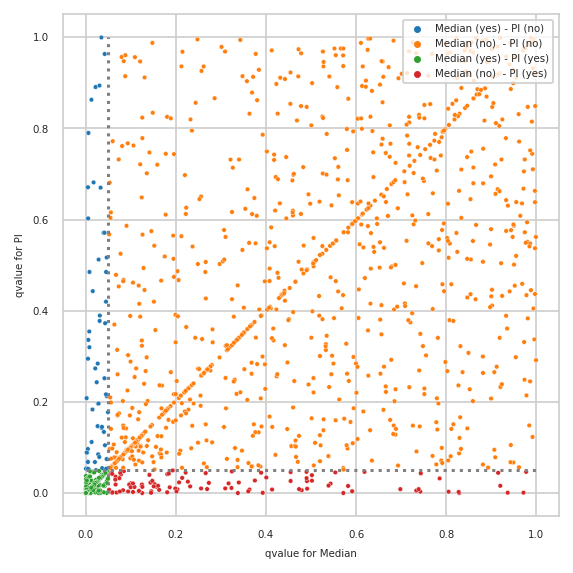

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_Median/diff_analysis_comparision_2_Median


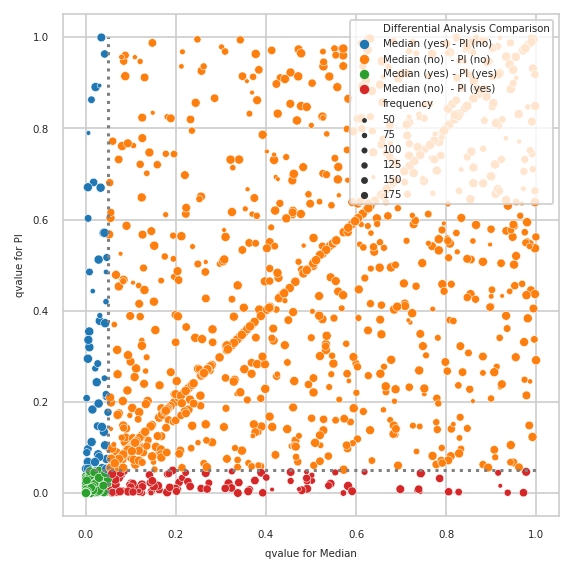

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out